# Aggregation

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import pysal

C:\Users\Esau Casimiro-Vieyra\Anaconda3\envs\pbpl204s19\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
df_county = pd.read_csv('ca_county_employment.csv')

In [3]:
df_county.shape

(986, 27)

In [4]:
df_county17 = df_county[df_county.year==2017]

In [5]:
df_county17.shape

(58, 27)

In [6]:
df_county17.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total,year
16,682.0,556.000000,1320.00,1641.000000,58880.000000,85334.000000,44799.00000,86879.0,54018.0,23259.000000,...,28074.00000,70332.00000,55917.0,9162.0,3879.0,33682.000000,74427.000000,Alameda,1066435.0,2017
33,0.0,7.000000,0.00,5.885938,100.744313,124.390782,1.00000,28.0,6.0,53.984102,...,56.80874,155.23479,44.0,1.0,2.0,46.537203,155.727597,Alpine,1214.0,2017
50,515.0,367.000000,210.00,32.836146,1056.000000,931.000000,390.60472,2151.0,263.0,197.000000,...,380.00000,1221.00000,1012.0,100.0,52.0,1968.000000,2729.000000,Amador,18111.0,2017
67,3591.0,1502.000000,262.00,566.000000,6250.000000,5278.000000,2430.00000,13850.0,1884.0,1172.000000,...,2124.00000,8695.00000,8453.0,564.0,335.0,4371.000000,11779.000000,Butte,114627.0,2017
84,613.0,126.914064,30.51,127.000000,1725.000000,606.000000,243.00000,1870.0,304.0,144.000000,...,692.00000,1227.00000,1449.0,128.0,67.0,369.000000,2244.000000,Calaveras,17066.0,2017


In [7]:
df_county17[['county', 'Farm', 'year']].head()

,county,Farm,year
16,Alameda,682.0,2017
33,Alpine,0.0,2017
50,Amador,515.0,2017
67,Butte,3591.0,2017
84,Calaveras,613.0,2017


In [8]:
df_county.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total,year
0,1012.0,716.0,800.0,3492.183139,51497.0,93998.0,50971.0,85151.0,35652.816861,24240.0,...,19749.0,46832.0,45198.0,10915.0,3862.0,38304.0,65247.0,Alameda,887315.0,2001
1,1145.0,646.0,784.0,3413.267580,48984.0,84449.0,47633.0,84602.0,33985.732420,22156.0,...,20524.0,47670.0,46892.0,10882.0,3852.0,40150.0,68566.0,Alameda,875474.0,2002
2,1008.0,527.0,736.0,3296.721645,51164.0,80262.0,46726.0,84568.0,32074.278355,21889.0,...,20363.0,47707.0,47255.0,11145.0,3864.0,39332.0,67076.0,Alameda,878177.0,2003
3,934.0,511.0,628.0,3099.820174,53477.0,81210.0,46079.0,83297.0,30317.179826,20990.0,...,20668.0,47578.0,46739.0,10862.0,3778.0,38391.0,68717.0,Alameda,880210.0,2004
4,970.0,486.0,608.0,3049.987080,56333.0,79433.0,45980.0,83889.0,30809.012920,21289.0,...,21030.0,47694.0,46813.0,10642.0,3574.0,37244.0,68106.0,Alameda,885435.0,2005


## Defining Regions
Let's do an example where we partition California into two regions. The first region is composed of Riverside and San Bernardino Counties, and the second region is all other counties.

### Aggregation Profile

In [9]:
counties = pd.unique(df_county17.county)
ie = [ "Riverside", "San Bernardino"]
non_ie = [county for county in counties if county not in ie]


In [10]:
non_ie

['Alameda',
 'Alpine',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Lake',
 'Lassen',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Modoc',
 'Mono',
 'Monterey',
 'Napa',
 'Nevada',
 'Orange',
 'Placer',
 'Plumas',
 'Sacramento',
 'San Benito',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba']

In [11]:
regions = [ie, non_ie] # our list of region lists

In [12]:
counties = df_county17.county

In [13]:
# Create a dictionary to assign a region id to each county, key is county, value is region id
region_dict = {}
for i,region in enumerate(regions):
    for county in region:
        region_dict[county] = i

In [14]:
region_dict

{'Riverside': 0,
 'San Bernardino': 0,
 'Alameda': 1,
 'Alpine': 1,
 'Amador': 1,
 'Butte': 1,
 'Calaveras': 1,
 'Colusa': 1,
 'Contra Costa': 1,
 'Del Norte': 1,
 'El Dorado': 1,
 'Fresno': 1,
 'Glenn': 1,
 'Humboldt': 1,
 'Imperial': 1,
 'Inyo': 1,
 'Kern': 1,
 'Kings': 1,
 'Lake': 1,
 'Lassen': 1,
 'Los Angeles': 1,
 'Madera': 1,
 'Marin': 1,
 'Mariposa': 1,
 'Mendocino': 1,
 'Merced': 1,
 'Modoc': 1,
 'Mono': 1,
 'Monterey': 1,
 'Napa': 1,
 'Nevada': 1,
 'Orange': 1,
 'Placer': 1,
 'Plumas': 1,
 'Sacramento': 1,
 'San Benito': 1,
 'San Diego': 1,
 'San Francisco': 1,
 'San Joaquin': 1,
 'San Luis Obispo': 1,
 'San Mateo': 1,
 'Santa Barbara': 1,
 'Santa Clara': 1,
 'Santa Cruz': 1,
 'Shasta': 1,
 'Sierra': 1,
 'Siskiyou': 1,
 'Solano': 1,
 'Sonoma': 1,
 'Stanislaus': 1,
 'Sutter': 1,
 'Tehama': 1,
 'Trinity': 1,
 'Tulare': 1,
 'Tuolumne': 1,
 'Ventura': 1,
 'Yolo': 1,
 'Yuba': 1}

In [15]:
# now create a new series in the dataframe with these region values
df_county17['region'] = [region_dict[county] for county in df_county17.county]

C:\Users\Esau Casimiro-Vieyra\Anaconda3\envs\pbpl204s19\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_county17.region

16     1
33     1
50     1
67     1
84     1
101    1
118    1
135    1
152    1
169    1
186    1
203    1
220    1
237    1
254    1
271    1
288    1
305    1
322    1
339    1
356    1
373    1
390    1
407    1
424    1
441    1
458    1
475    1
492    1
509    1
526    1
543    1
560    0
577    1
594    1
611    0
628    1
645    1
662    1
679    1
696    1
713    1
730    1
747    1
764    1
781    1
798    1
815    1
832    1
849    1
866    1
883    1
900    1
917    1
934    1
951    1
968    1
985    1
Name: region, dtype: int64

In [17]:
region_dict = {}
for i,region in enumerate(regions):
    for county in region:
        region_dict[county] = i

## Group By
We can use the `groupby` method of the dataframe to create a new group by object.

In [18]:
region_gb = df_county17.groupby('region')
region_gb.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Accommodation,Other,Federal,Military,State,Local,county,Total,year,region
16,682.0,556.000000,1320.00,1641.000000,58880.000000,85334.000000,44799.00000,86879.0,54018.0,23259.000000,...,70332.00000,55917.0,9162.0,3879.0,33682.000000,74427.000000,Alameda,1066435.0,2017,1
33,0.0,7.000000,0.00,5.885938,100.744313,124.390782,1.00000,28.0,6.0,53.984102,...,155.23479,44.0,1.0,2.0,46.537203,155.727597,Alpine,1214.0,2017,1
50,515.0,367.000000,210.00,32.836146,1056.000000,931.000000,390.60472,2151.0,263.0,197.000000,...,1221.00000,1012.0,100.0,52.0,1968.000000,2729.000000,Amador,18111.0,2017,1
67,3591.0,1502.000000,262.00,566.000000,6250.000000,5278.000000,2430.00000,13850.0,1884.0,1172.000000,...,8695.00000,8453.0,564.0,335.0,4371.000000,11779.000000,Butte,114627.0,2017,1
84,613.0,126.914064,30.51,127.000000,1725.000000,606.000000,243.00000,1870.0,304.0,144.000000,...,1227.00000,1449.0,128.0,67.0,369.000000,2244.000000,Calaveras,17066.0,2017,1
560,8308.0,6564.000000,2253.00,2183.000000,87528.000000,49478.000000,30483.00000,117728.0,58705.0,8853.000000,...,86158.00000,70133.0,7200.0,3931.0,14723.000000,111081.000000,Riverside,1031866.0,2017,0
611,2460.0,827.000000,1535.00,4106.000000,53871.000000,61678.000000,46671.00000,110996.0,97132.0,7370.000000,...,72150.00000,63604.0,13635.0,19837.0,13754.000000,97422.000000,San Bernardino,1021060.0,2017,0


In [19]:
# then we turn this into a region dataframe with as many records as regions
region_df = region_gb.sum(axis=0) # convert to a dataframe and sum the groups
region_df.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total,year
region,,,,,,,,,,,,,,,,,,,,,
0,10768.0,7391.000000,3788.000000,6289.000000,1.413990e+05,1.111560e+05,77154.000000,228724.0,155837.000000,16223.000000,...,38935.000000,1.583080e+05,133737.0,20835.0,23768.0,28477.000000,2.085030e+05,RiversideSan Bernardino,2052926.0,4034
1,226297.0,233828.771451,58774.111391,57663.460654,1.016946e+06,1.319115e+06,732058.634648,1861272.0,843734.364805,604561.846725,...,614060.689516,1.626153e+06,1279458.0,228115.0,182663.0,506049.610078,1.582426e+06,AlamedaAlpineAmadorButteCalaverasColusaContra ...,21531874.0,112952


## Exercise 3 Part 4: EDD Regions

We will do this using the official data from EDD but pulled out of a pdf.

In [20]:
# taken from first link at https://www.edd.ca.gov/jobs_and_training/pubs/wsd15-17.pdf
edd_regions = """Regional Planning Units

    1. Coastal Region (4 Local Workforce Development Boards [Local Boards]): Monterey, San Luis Obispo, Santa Barbara, Santa Cruz

Counties Included (4): Monterey, Santa Cruz, Santa Barbara, San Luis Obispo 

Major City Populations in Region: Salinas, Santa Maria, Santa Barbara, Monterey, San Luis Obispo, Santa Cruz

    2. Middle Sierra (1 Local Board): Mother Lode

Counties Included (4): Amador, Calaveras, Mariposa, Tuolumne

Major City Populations in Region: Sonora, Angels City

    3. Humboldt (1 Local Board): Humboldt 

Counties Included (1): Humboldt 

Major City Populations in Region: Eureka

    4. North State (1 Local Board): NORTEC

Counties Included (11): Del Norte, Siskiyou, Modoc, Trinity, Shasta, Tehama, Butte, Nevada, Sierra, Plumas, Lassen

Major City Populations in Region: Redding, Chico, Paradise, Oroville, Truckee, Susanville

    5. Capital Region (4 Local Boards): Golden Sierra, North Central Counties Consortium, SETA, Yolo

Counties Included (9): Alpine, Sacramento, Yolo, Sutter, Colusa, Glenn, Yuba, Placer, El Dorado

Major City Populations in Region: Sacramento, Elk Grove, Roseville

    6. East Bay (4 Local Boards): Contra Costa County, Alameda, Richmond, Oakland

Counties Included (2): Contra Costa, Alameda

Major City Populations in Region: Oakland, Fremont, Concord, Berkeley, Richmond, Antioch

    7. North Bay (5 Local Boards): Marin, Napa-Lake, Sonoma, Solano, Mendocino

Counties Included (6): Marin, Napa, Lake, Sonoma, Solano, and Mendocino

Major City Populations in Region: Santa Rosa, Vallejo, Fairfield, San Rafael, Napa, Ukiah

    8. Bay-Peninsula (4 Local Boards): San Francisco, NOVA, San Jose, San Benito

Counties Included (4): San Francisco, San Mateo, Santa Clara, San Benito

Major City Populations in Region: San Jose, San Francisco, Sunnyvale, Santa Clara, Daly City, San Mateo, Palo Alto

    9. San Joaquin Valley and Associated Counties (8 Local Boards): Fresno, Kern-Inyo-Mono,  Kings, Madera, Merced, San Joaquin, Stanislaus, Tulare

Counties Included (10): Fresno, Kern, Inyo, Mono, Kings, Madera, Merced, San Joaquin, Stanislaus, Tulare

Major City Populations in Region: Fresno, Bakersfield, Stockton, Modesto, Visalia, Clovis, Merced	

    10. Southern Border (2 Local Boards): San Diego, Imperial

Counties Included (2): San Diego, Imperial

Major City Populations in Region: San Diego, Chula Vista, Oceanside, Escondido, Carlsbad, El Cajon

    11. Los Angeles Basin (7 Local Boards): Los Angeles City, Los Angeles County, Foothill, Southeast Los Angeles County, South Bay, Verdugo, Pacific Gateway 

Counties Included (1): Los Angeles 

Major City Populations in Region: Los Angeles, Long Beach, Santa Clarita, Glendale, Lancaster, Palmdale, Pomona, Torrance, Pasadena, El Monte, Downey, Inglewood, West Covina, Norwalk, Burbank, Carson, Compton, Santa Monica

    12. Orange (3 Local Boards): Santa Ana, Orange, Anaheim

Counties Included (1): Orange

Major City Populations in Region: Anaheim, Santa Ana, Irvine, Huntington Beach, Garden Grove, Orange, Fullerton, Costa Mesa, Mission Viejo

    13. Inland Empire (3 Local Boards): Riverside, San Bernardino County, San Bernardino City

Counties Included (2): Riverside, San Bernardino

Major City Populations in Region: Riverside, San Bernardino, Fontana, Moreno Valley, Rancho Cucamonga, Ontario, Corona, Victorville, Murrieta, Temecula, Rialto

    14. Ventura (1 Local Board): Ventura

Counties Included (1): Ventura

Major City Populations in Region: Oxnard, Thousand Oaks, Simi Valley, San Buenaventura
"""

In [21]:
edd_regions

'Regional Planning Units\n\n    1. Coastal Region (4 Local Workforce Development Boards [Local Boards]): Monterey, San Luis Obispo, Santa Barbara, Santa Cruz\n\nCounties Included (4): Monterey, Santa Cruz, Santa Barbara, San Luis Obispo \n\nMajor City Populations in Region: Salinas, Santa Maria, Santa Barbara, Monterey, San Luis Obispo, Santa Cruz\n\n    2. Middle Sierra (1 Local Board): Mother Lode\n\nCounties Included (4): Amador, Calaveras, Mariposa, Tuolumne\n\nMajor City Populations in Region: Sonora, Angels City\n\n    3. Humboldt (1 Local Board): Humboldt \n\nCounties Included (1): Humboldt \n\nMajor City Populations in Region: Eureka\n\n    4. North State (1 Local Board): NORTEC\n\nCounties Included (11): Del Norte, Siskiyou, Modoc, Trinity, Shasta, Tehama, Butte, Nevada, Sierra, Plumas, Lassen\n\nMajor City Populations in Region: Redding, Chico, Paradise, Oroville, Truckee, Susanville\n\n    5. Capital Region (4 Local Boards): Golden Sierra, North Central Counties Consortium, 

In [22]:
regions = {}
edd_lines = edd_regions.split("\n\n")
for line in edd_lines:
    #print(line)
    if "Counties Included" in line:
        print(line)

Counties Included (4): Monterey, Santa Cruz, Santa Barbara, San Luis Obispo 
Counties Included (4): Amador, Calaveras, Mariposa, Tuolumne
Counties Included (1): Humboldt 
Counties Included (11): Del Norte, Siskiyou, Modoc, Trinity, Shasta, Tehama, Butte, Nevada, Sierra, Plumas, Lassen
Counties Included (9): Alpine, Sacramento, Yolo, Sutter, Colusa, Glenn, Yuba, Placer, El Dorado
Counties Included (2): Contra Costa, Alameda
Counties Included (6): Marin, Napa, Lake, Sonoma, Solano, and Mendocino
Counties Included (4): San Francisco, San Mateo, Santa Clara, San Benito
Counties Included (10): Fresno, Kern, Inyo, Mono, Kings, Madera, Merced, San Joaquin, Stanislaus, Tulare
Counties Included (2): San Diego, Imperial
Counties Included (1): Los Angeles 
Counties Included (1): Orange
Counties Included (2): Riverside, San Bernardino
Counties Included (1): Ventura


# Sorting the Regions by the number of counties within the Region

In [78]:
regions.sort(key=len)
print(regions)

[[' Humboldt '], [' Los Angeles '], [' Orange'], [' Ventura'], [' Contra Costa', ' Alameda'], [' San Diego', ' Imperial'], [' Riverside', ' San Bernardino'], [' Monterey', ' Santa Cruz', ' Santa Barbara', ' San Luis Obispo '], [' Amador', ' Calaveras', ' Mariposa', ' Tuolumne'], [' San Francisco', ' San Mateo', ' Santa Clara', ' San Benito'], [' Marin', ' Napa', ' Lake', ' Sonoma', ' Solano', 'Mendocino'], [' Alpine', ' Sacramento', ' Yolo', ' Sutter', ' Colusa', ' Glenn', ' Yuba', ' Placer', ' El Dorado'], [' Fresno', ' Kern', ' Inyo', ' Mono', ' Kings', ' Madera', ' Merced', ' San Joaquin', ' Stanislaus', ' Tulare'], [' Del Norte', ' Siskiyou', ' Modoc', ' Trinity', ' Shasta', ' Tehama', ' Butte', ' Nevada', ' Sierra', ' Plumas', ' Lassen']]


In [79]:
regions = []
edd_lines = edd_regions.split("\n\n")
region=0
for line in edd_lines:
    #print(line)
    if "Counties Included" in line:
        print(line)
        left, right = line.split(":")
        if ' and ' in right:
            right = right.replace(" and ", "")
        counties = right.split(",")
        
        regions.append(counties)
        
        

Counties Included (4): Monterey, Santa Cruz, Santa Barbara, San Luis Obispo 
Counties Included (4): Amador, Calaveras, Mariposa, Tuolumne
Counties Included (1): Humboldt 
Counties Included (11): Del Norte, Siskiyou, Modoc, Trinity, Shasta, Tehama, Butte, Nevada, Sierra, Plumas, Lassen
Counties Included (9): Alpine, Sacramento, Yolo, Sutter, Colusa, Glenn, Yuba, Placer, El Dorado
Counties Included (2): Contra Costa, Alameda
Counties Included (6): Marin, Napa, Lake, Sonoma, Solano, and Mendocino
Counties Included (4): San Francisco, San Mateo, Santa Clara, San Benito
Counties Included (10): Fresno, Kern, Inyo, Mono, Kings, Madera, Merced, San Joaquin, Stanislaus, Tulare
Counties Included (2): San Diego, Imperial
Counties Included (1): Los Angeles 
Counties Included (1): Orange
Counties Included (2): Riverside, San Bernardino
Counties Included (1): Ventura


In [80]:
regions

[[' Monterey', ' Santa Cruz', ' Santa Barbara', ' San Luis Obispo '],
 [' Amador', ' Calaveras', ' Mariposa', ' Tuolumne'],
 [' Humboldt '],
 [' Del Norte',
  ' Siskiyou',
  ' Modoc',
  ' Trinity',
  ' Shasta',
  ' Tehama',
  ' Butte',
  ' Nevada',
  ' Sierra',
  ' Plumas',
  ' Lassen'],
 [' Alpine',
  ' Sacramento',
  ' Yolo',
  ' Sutter',
  ' Colusa',
  ' Glenn',
  ' Yuba',
  ' Placer',
  ' El Dorado'],
 [' Contra Costa', ' Alameda'],
 [' Marin', ' Napa', ' Lake', ' Sonoma', ' Solano', 'Mendocino'],
 [' San Francisco', ' San Mateo', ' Santa Clara', ' San Benito'],
 [' Fresno',
  ' Kern',
  ' Inyo',
  ' Mono',
  ' Kings',
  ' Madera',
  ' Merced',
  ' San Joaquin',
  ' Stanislaus',
  ' Tulare'],
 [' San Diego', ' Imperial'],
 [' Los Angeles '],
 [' Orange'],
 [' Riverside', ' San Bernardino'],
 [' Ventura']]

In [25]:
n = 0
for region in regions:
    n += len(region)

In [26]:
n

58

In [27]:
region_dict = {}
for i,region in enumerate(regions):
    for county in region:
        county = county.strip() # get rid of leading white space
        
        region_dict[county] = i

In [28]:
region_dict

{'Monterey': 0,
 'Santa Cruz': 0,
 'Santa Barbara': 0,
 'San Luis Obispo': 0,
 'Amador': 1,
 'Calaveras': 1,
 'Mariposa': 1,
 'Tuolumne': 1,
 'Humboldt': 2,
 'Del Norte': 3,
 'Siskiyou': 3,
 'Modoc': 3,
 'Trinity': 3,
 'Shasta': 3,
 'Tehama': 3,
 'Butte': 3,
 'Nevada': 3,
 'Sierra': 3,
 'Plumas': 3,
 'Lassen': 3,
 'Alpine': 4,
 'Sacramento': 4,
 'Yolo': 4,
 'Sutter': 4,
 'Colusa': 4,
 'Glenn': 4,
 'Yuba': 4,
 'Placer': 4,
 'El Dorado': 4,
 'Contra Costa': 5,
 'Alameda': 5,
 'Marin': 6,
 'Napa': 6,
 'Lake': 6,
 'Sonoma': 6,
 'Solano': 6,
 'Mendocino': 6,
 'San Francisco': 7,
 'San Mateo': 7,
 'Santa Clara': 7,
 'San Benito': 7,
 'Fresno': 8,
 'Kern': 8,
 'Inyo': 8,
 'Mono': 8,
 'Kings': 8,
 'Madera': 8,
 'Merced': 8,
 'San Joaquin': 8,
 'Stanislaus': 8,
 'Tulare': 8,
 'San Diego': 9,
 'Imperial': 9,
 'Los Angeles': 10,
 'Orange': 11,
 'Riverside': 12,
 'San Bernardino': 12,
 'Ventura': 13}

In [29]:
df_county17['region'] = [region_dict[county] for county in df_county17.county]

C:\Users\Esau Casimiro-Vieyra\Anaconda3\envs\pbpl204s19\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_county17

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Accommodation,Other,Federal,Military,State,Local,county,Total,year,region
16,682.0,556.000000,1320.000000,1641.000000,58880.000000,85334.000000,44799.000000,86879.0,54018.000000,23259.000000,...,70332.000000,55917.0,9162.0,3879.0,33682.000000,74427.000000,Alameda,1066435.0,2017,5
33,0.0,7.000000,0.000000,5.885938,100.744313,124.390782,1.000000,28.0,6.000000,53.984102,...,155.234790,44.0,1.0,2.0,46.537203,155.727597,Alpine,1214.0,2017,4
50,515.0,367.000000,210.000000,32.836146,1056.000000,931.000000,390.604720,2151.0,263.000000,197.000000,...,1221.000000,1012.0,100.0,52.0,1968.000000,2729.000000,Amador,18111.0,2017,1
67,3591.0,1502.000000,262.000000,566.000000,6250.000000,5278.000000,2430.000000,13850.0,1884.000000,1172.000000,...,8695.000000,8453.0,564.0,335.0,4371.000000,11779.000000,Butte,114627.0,2017,3
84,613.0,126.914064,30.510000,127.000000,1725.000000,606.000000,243.000000,1870.0,304.000000,144.000000,...,1227.000000,1449.0,128.0,67.0,369.000000,2244.000000,Calaveras,17066.0,2017,1
101,2229.0,117.979506,28.362142,72.000000,211.000000,1350.000000,664.000000,788.0,322.000000,22.000000,...,608.000000,502.0,69.0,32.0,33.000000,2144.000000,Colusa,11747.0,2017,4
118,939.0,636.000000,1594.000000,1697.109764,36601.000000,18684.000000,13796.000000,54784.0,24956.890236,10342.000000,...,38569.000000,34986.0,4846.0,1747.0,635.000000,42954.000000,Contra Costa,566859.0,2017,5
135,308.0,381.000000,37.000000,23.437815,382.000000,183.000000,278.806196,1160.0,151.000000,95.000000,...,949.000000,542.0,148.0,49.0,1509.000000,1980.000000,Del Norte,10877.0,2017,3
152,1328.0,453.000000,314.000000,213.000000,8190.000000,3531.000000,1407.000000,8830.0,1213.000000,1016.000000,...,8635.000000,6041.0,702.0,280.0,381.000000,9683.000000,El Dorado,91651.0,2017,4
169,18164.0,32368.000000,770.000000,2476.000000,23054.000000,27635.000000,16838.000000,47275.0,19798.000000,4472.000000,...,32598.000000,27917.0,9924.0,1632.0,12578.000000,50008.000000,Fresno,495917.0,2017,8


In [31]:
df_county17.region

16      5
33      4
50      1
67      3
84      1
101     4
118     5
135     3
152     4
169     8
186     4
203     2
220     9
237     8
254     8
271     8
288     6
305     3
322    10
339     8
356     6
373     1
390     6
407     8
424     3
441     8
458     0
475     6
492     3
509    11
526     4
543     3
560    12
577     4
594     7
611    12
628     9
645     7
662     8
679     0
696     7
713     0
730     7
747     0
764     3
781     3
798     3
815     6
832     6
849     8
866     4
883     3
900     3
917     8
934     1
951    13
968     4
985     4
Name: region, dtype: int64

In [32]:
s = ' San Bernardino'
s.strip()

'San Bernardino'

In [33]:
df_county17[['region', 'county']].head()

,region,county
16,5,Alameda
33,4,Alpine
50,1,Amador
67,3,Butte
84,1,Calaveras


In [34]:
region_gb = df_county17.groupby('region')
region_gb.head()

region_df = region_gb.sum(axis=0) # convert to a datafram



In [35]:
region_df.sort_values(by='Total')

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total,year
region,,,,,,,,,,,,,,,,,,,,,
1,1844.0,760.923670,374.926270,285.313080,4895.000000,2811.000000,1015.338265,7707.0,982.000000,637.000000,...,2060.000000,6753.000000,4818.0,1383.0,219.0,3822.000000,9877.000000,AmadorCalaverasMariposaTuolumne,69575.0,8068
2,1409.0,569.575433,136.925299,154.181363,4672.000000,3060.000000,1335.000000,9070.0,2267.317906,618.000000,...,1926.000000,6002.000000,5163.0,810.0,388.0,3444.000000,9638.000000,Humboldt,72735.0,2017
3,12046.0,5546.628208,1576.591694,1560.937336,21404.642716,15129.886432,6764.627403,40002.0,8194.892504,3449.862623,...,8277.880776,25685.564598,24372.0,6145.0,1089.0,11662.000000,41106.000000,ButteDel NorteLassenModocNevadaPlumasShastaSie...,352440.0,22187
13,16714.0,7195.000000,2407.000000,1087.000000,23987.000000,33337.000000,16238.000000,50009.0,9486.000000,7227.000000,...,12263.000000,34841.000000,26937.0,7273.0,4902.0,2657.000000,36180.000000,Ventura,468725.0,2017
0,40700.0,50361.000000,3636.000000,3737.004254,42803.000000,39070.000000,20878.000000,77559.0,17390.995746,11065.000000,...,23055.000000,82323.000000,50497.0,9942.0,8738.0,30969.072875,71775.927125,MontereySan Luis ObispoSanta BarbaraSanta Cruz,858567.0,8068
6,14478.0,9615.931469,2548.831987,2501.968130,55908.000000,64149.000000,22150.000000,88695.0,22065.268414,10755.000000,...,27432.000000,72294.000000,54167.0,6535.0,9342.0,17134.000000,69094.000000,LakeMarinMendocinoNapaSolanoSonoma,879328.0,12102
4,17588.0,9798.979506,2730.362142,4214.285365,87058.744313,46617.390782,35689.239663,136265.0,53273.000000,16504.984102,...,31555.808740,100235.234790,81098.0,16236.0,8355.0,130488.537203,116587.727597,AlpineColusaEl DoradoGlennPlacerSacramentoSutt...,1429816.0,18153
5,1621.0,1192.000000,2914.000000,3338.109764,95481.000000,104018.000000,58595.000000,141663.0,78974.890236,33601.000000,...,43452.000000,108901.000000,90903.0,14008.0,5626.0,34317.000000,117381.000000,AlamedaContra Costa,1633294.0,4034
8,92143.0,131051.733166,15777.474000,7728.121676,90480.000000,119024.000000,61133.351179,191871.0,100010.000000,13063.000000,...,24494.000000,126868.000000,104992.0,28236.0,13971.0,47489.000000,216784.000000,FresnoInyoKernKingsMaderaMercedMonoSan Joaquin...,1941035.0,20170


# HHI Function for Regions

In [36]:
region_df.shape

(14, 27)

In [37]:
def hhi(e):
    s = 100 * e / e.sum()
    s = np.rint(s).astype('i')
    return (s**2).sum()

Need to change the dataframe into 'float' type. Without the change, the string column attached to the region_df dataframe will mess with the function and will not run it. Once the string has been "removed" by iterating by rows, it should get rid of the string issue.

In [38]:
hhvalues = []
for index, row in region_df.iterrows():    
    e = row.values[:24].astype(float)
    hhvalues.append(hhi(e))

In [39]:
region_df['hhi'] = hhvalues

In [40]:
region_df.hhi

region
0     641
1     741
2     796
3     755
4     692
5     686
6     688
7     741
8     671
9     650
10    678
11    692
12    747
13    663
Name: hhi, dtype: int64

# Sort by hhi values. From lowest concentration to highest.

In [41]:
region_df.sort_values(by='hhi')[['hhi', 'county']]

,hhi,county
region,,
0,641,MontereySan Luis ObispoSanta BarbaraSanta Cruz
9,650,ImperialSan Diego
13,663,Ventura
8,671,FresnoInyoKernKingsMaderaMercedMonoSan Joaquin...
10,678,Los Angeles
5,686,AlamedaContra Costa
6,688,LakeMarinMendocinoNapaSolanoSonoma
4,692,AlpineColusaEl DoradoGlennPlacerSacramentoSutt...
11,692,Orange


In [42]:
region_df[['county', 'Military']].sort_values(by='Military')

,county,Military
region,,
1,AmadorCalaverasMariposaTuolumne,219.0
2,Humboldt,388.0
3,ButteDel NorteLassenModocNevadaPlumasShastaSie...,1089.0
13,Ventura,4902.0
11,Orange,5099.0
5,AlamedaContra Costa,5626.0
7,San BenitoSan FranciscoSan MateoSanta Clara,6360.0
4,AlpineColusaEl DoradoGlennPlacerSacramentoSutt...,8355.0
0,MontereySan Luis ObispoSanta BarbaraSanta Cruz,8738.0


In [43]:
region_df[['county', 'Arts']].sort_values(by='Arts',ascending=False)

,county,Arts
region,,
10,Los Angeles,245236.000000
11,Orange,72466.000000
7,San BenitoSan FranciscoSan MateoSanta Clara,66722.000000
9,ImperialSan Diego,55121.000000
5,AlamedaContra Costa,43452.000000
12,RiversideSan Bernardino,38935.000000
4,AlpineColusaEl DoradoGlennPlacerSacramentoSutt...,31555.808740
6,LakeMarinMendocinoNapaSolanoSonoma,27432.000000
8,FresnoInyoKernKingsMaderaMercedMonoSan Joaquin...,24494.000000


## Sort regions by highest employment in 2017

In [44]:
region_df[['county', 'Total']].sort_values(by= 'Total' , ascending=False)

,county,Total
region,,
10,Los Angeles,6438487.0
7,San BenitoSan FranciscoSan MateoSanta Clara,2942977.0
11,Orange,2252645.0
9,ImperialSan Diego,2192250.0
12,RiversideSan Bernardino,2052926.0
8,FresnoInyoKernKingsMaderaMercedMonoSan Joaquin...,1941035.0
5,AlamedaContra Costa,1633294.0
4,AlpineColusaEl DoradoGlennPlacerSacramentoSutt...,1429816.0
6,LakeMarinMendocinoNapaSolanoSonoma,879328.0


In [45]:
region_df[['county', 'State']].sort_values(by='State',ascending=False)

,county,State
region,,
4,AlpineColusaEl DoradoGlennPlacerSacramentoSutt...,130488.537203
10,Los Angeles,91604.000000
7,San BenitoSan FranciscoSan MateoSanta Clara,51432.000000
9,ImperialSan Diego,49545.000000
8,FresnoInyoKernKingsMaderaMercedMonoSan Joaquin...,47489.000000
5,AlamedaContra Costa,34317.000000
11,Orange,31486.000000
0,MontereySan Luis ObispoSanta BarbaraSanta Cruz,30969.072875
12,RiversideSan Bernardino,28477.000000


## Mapping Aggregation 

In [59]:
odf = geopandas.read_file('azca.shp')

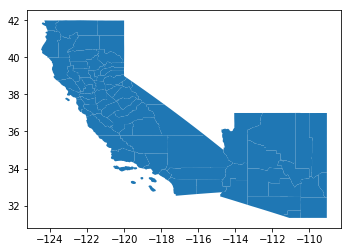

In [60]:
odf.plot()

In [61]:
odf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.655585 39.69356, -120.655524 39..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-121.188571 38.714308, -121.18731 38..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"(POLYGON ((-120.581897 34.098557, -120.582264 ..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-120.630933 38.3411, -120.630566 38...."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"(POLYGON ((-119.636302 33.27304, -119.636068 3..."


In [62]:
ca_gdf = odf[odf.STATEFP=='06']

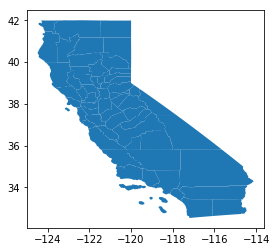

In [63]:
ca_gdf.plot()

In [64]:
ca_gdf.shape

(58, 18)

In [65]:
df_county17.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Accommodation,Other,Federal,Military,State,Local,county,Total,year,region
16,682.0,556.000000,1320.00,1641.000000,58880.000000,85334.000000,44799.00000,86879.0,54018.0,23259.000000,...,70332.00000,55917.0,9162.0,3879.0,33682.000000,74427.000000,Alameda,1066435.0,2017,5
33,0.0,7.000000,0.00,5.885938,100.744313,124.390782,1.00000,28.0,6.0,53.984102,...,155.23479,44.0,1.0,2.0,46.537203,155.727597,Alpine,1214.0,2017,4
50,515.0,367.000000,210.00,32.836146,1056.000000,931.000000,390.60472,2151.0,263.0,197.000000,...,1221.00000,1012.0,100.0,52.0,1968.000000,2729.000000,Amador,18111.0,2017,1
67,3591.0,1502.000000,262.00,566.000000,6250.000000,5278.000000,2430.00000,13850.0,1884.0,1172.000000,...,8695.00000,8453.0,564.0,335.0,4371.000000,11779.000000,Butte,114627.0,2017,3
84,613.0,126.914064,30.51,127.000000,1725.000000,606.000000,243.00000,1870.0,304.0,144.000000,...,1227.00000,1449.0,128.0,67.0,369.000000,2244.000000,Calaveras,17066.0,2017,1


In [66]:
ca_gdf.merge(df_county17, left_on='NAME', right_on='county')

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,Accommodation,Other,Federal,Military,State,Local,county,Total,year,region
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,...,91.000000,52.0,41.0,4.0,0.000000,325.000000,Sierra,1128.0,2017,3
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,58524.000000,50710.0,9265.0,2969.0,102063.000000,65488.000000,Sacramento,869288.0,2017,4
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,...,26097.000000,16158.0,3636.0,3093.0,7403.072875,24772.927125,Santa Barbara,277989.0,2017,0
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,1227.000000,1449.0,128.0,67.0,369.000000,2244.000000,Calaveras,17066.0,2017,1
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,34841.000000,26937.0,7273.0,4902.0,2657.000000,36180.000000,Ventura,468725.0,2017,13
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,...,474637.000000,438587.0,48551.0,17248.0,91604.000000,457108.000000,Los Angeles,6438487.0,2017,10
6,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,...,24409.000000,18747.0,1403.0,1474.0,4195.000000,23472.000000,Sonoma,304489.0,2017,6
7,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,546,...,3340.000000,2549.0,1160.0,4890.0,5798.000000,7825.000000,Kings,61723.0,2017,8
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,...,177800.000000,124814.0,47386.0,100959.0,46435.000000,151304.000000,San Diego,2112512.0,2017,9
9,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,...,19949.000000,13507.0,718.0,595.0,734.000000,17522.000000,Placer,234015.0,2017,4


In [67]:
ca_gdf = ca_gdf.merge(df_county17, left_on='NAME', right_on='county')

In [68]:
ca_gdf

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,Accommodation,Other,Federal,Military,State,Local,county,Total,year,region
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,...,91.000000,52.0,41.0,4.0,0.000000,325.000000,Sierra,1128.0,2017,3
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,58524.000000,50710.0,9265.0,2969.0,102063.000000,65488.000000,Sacramento,869288.0,2017,4
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,...,26097.000000,16158.0,3636.0,3093.0,7403.072875,24772.927125,Santa Barbara,277989.0,2017,0
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,1227.000000,1449.0,128.0,67.0,369.000000,2244.000000,Calaveras,17066.0,2017,1
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,34841.000000,26937.0,7273.0,4902.0,2657.000000,36180.000000,Ventura,468725.0,2017,13
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,...,474637.000000,438587.0,48551.0,17248.0,91604.000000,457108.000000,Los Angeles,6438487.0,2017,10
6,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,...,24409.000000,18747.0,1403.0,1474.0,4195.000000,23472.000000,Sonoma,304489.0,2017,6
7,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,546,...,3340.000000,2549.0,1160.0,4890.0,5798.000000,7825.000000,Kings,61723.0,2017,8
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,...,177800.000000,124814.0,47386.0,100959.0,46435.000000,151304.000000,San Diego,2112512.0,2017,9
9,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,...,19949.000000,13507.0,718.0,595.0,734.000000,17522.000000,Placer,234015.0,2017,4


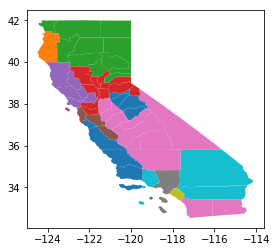

In [69]:
ca_gdf.plot(column='region', categorical=True)

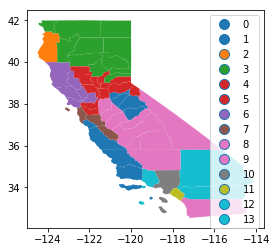

In [70]:
ca_gdf.plot(column='region', categorical=True, legend=True)

In [71]:
regions_df = ca_gdf.dissolve(by='region')

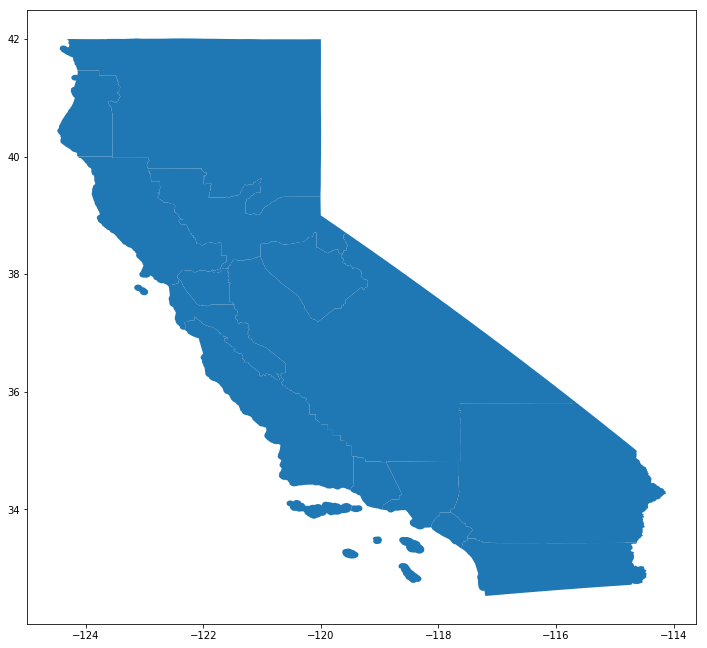

In [72]:
f = regions_df.plot(figsize=(12, 12))


In [73]:
regions_df.shape

(14, 45)

In [74]:
regions_df.columns

Index(['geometry', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Farm',
       'Forestry', 'Mining', 'Utilities', 'Construction', 'Manufacturing',
       'Wholesale', 'Retail', 'Transportation', 'Information', 'Finance',
       'Real', 'Professional', 'Management', 'Administrative', 'Educational',
       'Health', 'Arts', 'Accommodation', 'Other', 'Federal', 'Military',
       'State', 'Local', 'county', 'Total', 'year'],
      dtype='object')

In [75]:
regions_df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64', name='region')

In [76]:
regions_df['region'] = regions_df.index.values

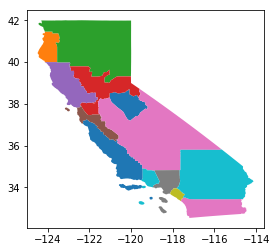

In [77]:
regions_df.plot(column='region', categorical='True')

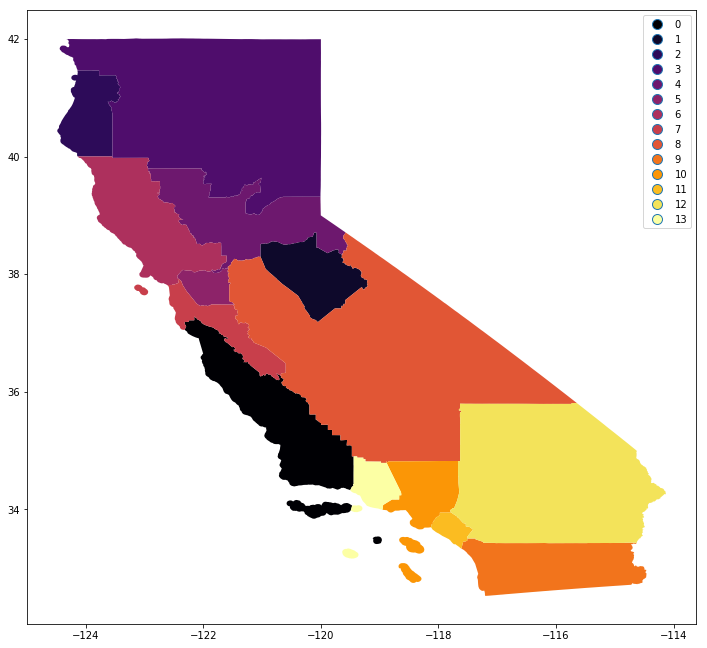

In [78]:
f = regions_df.plot(column='region', categorical=True, legend=True, cmap='inferno', figsize= (12,12))

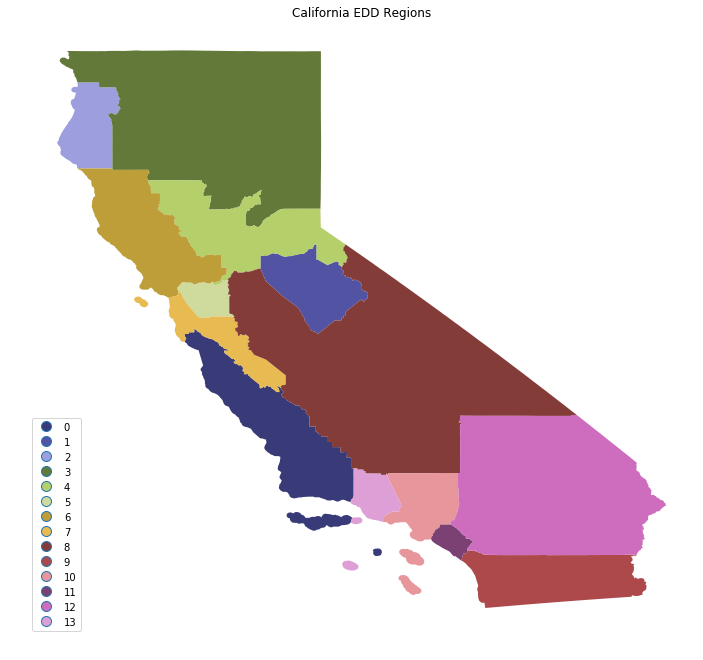

In [79]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax =regions_df.plot(column='region', categorical=True, legend=True, 
                cmap='tab20b', legend_kwds={'loc': 'lower left'}, ax=ax)

ax.set_axis_off()
plt.title('California EDD Regions')
plt.show()



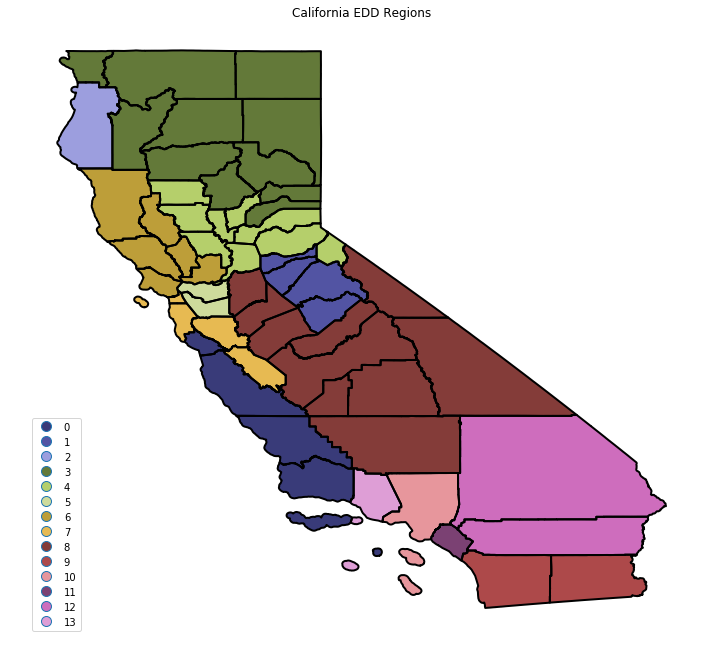

In [80]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax =regions_df.plot(column='region', categorical=True, legend=True, 
                cmap='tab20b', legend_kwds={'loc': 'lower left'}, ax=ax)

ca_gdf.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)

ax.set_axis_off()
plt.title('California EDD Regions')
plt.show()



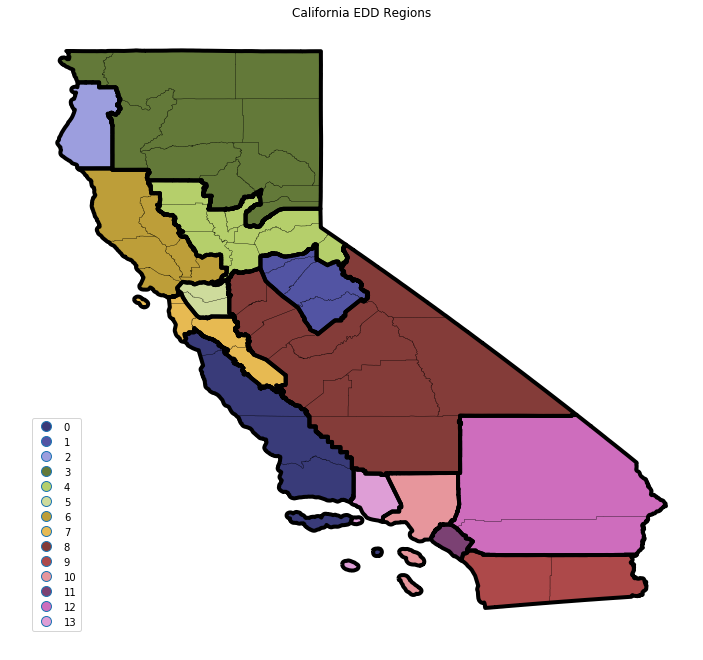

In [81]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax =regions_df.plot(column='region', categorical=True, legend=True, 
                cmap='tab20b', legend_kwds={'loc': 'lower left'}, ax=ax)

ca_gdf.geometry.boundary.plot(color=None,edgecolor='k',linewidth = .2,ax=ax)
regions_df.geometry.boundary.plot(color=None, edgecolor='k', linewidth=4, ax=ax)
ax.set_axis_off()
plt.title('California EDD Regions')
plt.show()

